# Data Preprocessing and EDA


## Description

Learn how to transform unclean raw data into clean data which can then be used for building machine learning models. You will also learn how to learn how to look for trends, correlations and patterns within the data which can be exploited during the model building phase.


## Overview:



## Pre-requisites:
- Python (NumPy and pandas)
- Statistics (Descriptive and Inferential)


## Learning Outcome:
- Detect missing values, skewness, outliers
- Treatment of missing values, skewness, outliers
- Normalizing data and aggregation
- Encoding of categorical variables
- Univariable exploration
- Multivariate exploration

## 1. Data Cleaning

### Description: In this chapter, we will motivate why we need data preprocessing and EDA and discuss in details about detecting and treating missing data and outliers.  

### 1.1 Why preprocess and explore data?

***

Well, you might wonder why we need to preprocess and explore data? Till now, you have applied ML models on data without any issues .

That's because, at the backend a lot of processing was done to ensure that the model could be applied directly. Let's look at the raw data before processing and try to apply the model.

At the end of the day **Data Preprocessing** is a black art and you need to do a lot of things in order to find the best combination. 


**Raw data before preprocessing**

This is how the data looks before preprocessing. 

<img src='../images/head.png'>


**Apply linear regression to raw data**

Lets apply a linear regression model to this raw data (after splitting into training and test features plus targets) and see if the process goes smoothly. Remeber in our data `SalePrice` is the target.

~~~python
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate linear model
model = LinearRegression()

# Fit linear model
model.fit(X_train, y_train)
~~~

**Outcome of applying linear model**

The outcome of the code snippet above is:

<img src='../images/error_1.png'>

<img src='../images/error_2.png'>

Our model (Linear Regression) cannot handle missing and categorical data. Missing data need to be treated and categorical ones must be converted into numerical ones.

Hence, to actually build the model we need to process the data and perform a lot of cleaning. Now the next question comes up - **What is the need to explore data?** Data exploration to visualize and analyze data helps to arrive at a hypothesis that can be tested while model building. Understanding the relationships between features and target and also among features themselves helps us validate our assumptions regarding the data before actually building the model. Also, outliers play spoilsport with any model and hence finding the outliers and removing them is of paramount importance. 

Think of EDA as inspecting a land before building a house. It gives us the lay of the land and (hopefully!) not throw any surprises while building the model. 

## Split into training and test datasets

In this task you will split your dataset into training and test groups

### Instructions
- Load data using `filepath` as argument inside `.read_csv()` method of pandas and save it as `df`
- Split `df` into features `X` and target `y` using `.iloc[]`. Keep in mind you have features as the first $7$ columns and the last column as target
- Then split into training and test features and target using `train_test_split(X, y, test_size, random_state)` with `test_size` as $20$% and `random_state=2` and save them as `X_train`, `X_test`, `y_train` and `y_test`
- Print out `X_train` and `X_test` to have a glimpse of the data

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
filepath = '../data/data.csv'

# Code starts here

# Load data
df = pd.read_csv(filepath)

# Split into features and target
X, y = df.iloc[:,:7], df[['SalePrice']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Code ends here

## Hints
- To load data as `df` use `df = pd.read_csv(filepath)`
- To split into features and target use `df.iloc[:,:7]` and `df[['SalePrice']]`
- Use `test_size=0.2` and `random_state=2` inside `train_test_split()` for train-test split

## Test cases
- Check for variable initialization, type and shape of `df`.Shape = (1460, 8) and type = `pd.core.frame.DataFrame`
- Check for variable initialization, type and shape of `X` and `y`. Shape of `X` = (1460,7) and `y` = (1460,1) and type of both is `pd.core.frame.DataFrame`
- Check for variable initialization, type and shape of `X_train`, `y_train`, `X_test` and `y_test`. Shape of `X_train` = (1168, 7), `X_test` = (292,7), `y_train` = (1168, 1) and `y_test` = (292, 1). All their types is `pd.core.frame.DataFrame`

### 1.2 Outlier Detection

***

With data at hand you might be tempted to start gathering insights from it. But wait! Did you observe some abnormality in the data? If you hadn't then its time you explore your data and look for any sort of abnormality and whether it can be explained from the data itself. These abnormalities are referred to as outliers. 

The first phase is the detection phase where you identify potential outliers. Next comes the treatment phase where you treat these abnormalities by either replacing them with some value of your choice or deleting them altogether. 

But always remember:

**”Sometimes outliers are bad data, and should be excluded, such as typos. Sometimes they are `Roger Federer` or `Usain Bolt`, and should be kept.” It is here that domain knowledge and practical wisdom are the only ways to differentiate.**


**What are outliers?**

Outliers are extreme values which deviate significantly from the underlying trend of the data at hand. As per Wikipedia *"In statistics, an outlier is an observation point that is distant from other observations."* The image below gives a powerful represention of what you may call an outlier in true sense.

<img src='../images/outlier.jpeg'>

Here, all the numbers in the $30$s range except number $3$. That's our outlier, because it is nowhere near to the other numbers. 


**But how did outliers get introduced?**

Any data science project begins with data collection phase. This phase is extremely prone to errors as mistakes might happen during data entry and the worst part is you might not even know that they got introduced in the first place.


**Why care about them?**

Outliers are undesirable values which need to be treated effectively as they significantly distort our measures as well as insights. The reasons we need to handle outliers are: 
- They distort the overall picture we obtain using descriptive statitics and data visualization as outliers can have significant effect on statistics such as mean, range etc.
- Outliers play spoilsport with many machine learning algorithms and statistical models.
- On the other hand some tasks like anomaly detection search exclusively for outliers.

Now lets proceed to discussing various methods for outlier detection:

**Outlier Detection with visualization**

Visualization is one of the most simple and probably the best way to look for any outliers; if present. Lets look at the different ways by which it can be accomplished:

- **Univariate outlier detection with BOXPLOT**: Box and whisker plots are pretty effective in pointing out outliers for a particular numerical feature. If you remember it takes advantage of the **IQR(Inter-Quartile Range)** to detect outliers. In case you forgot the below image will give you a clear idea about this method. 

<img src='../images/iqr.png'>

Lets look at the boxplot for `GrLivArea`

<img src='../images/boxplot.png'>

You can observe that values somewhat above $2700$ are considered as outliers. 


- **Bivariate outlier detection with SCATTER-PLOT**: Apart from carrying out univariate analysis you can also do a bivariate analysis using a scatter plot. For ex: You can take an explanatory variable on the X-axes and response on the Y-axes and generate a scatter plot for the combination and visually observe outliers. 

    Lets plot out `SalePrice` against `GrLivArea` to look out for abnormal houses. The code snippet is shown below:
```python
plt.figure(figsize=(8,6))
plt.scatter(X_train['GrLivArea'], y_train['SalePrice'], color='red', marker='x')
plt.show()
```
The plot looks something like this: <img src='../images/scatter.png'>

As you can clearly observe there are two values at the bottom right of the scatter plot. Don't they look suspicious to you?

You would expect the prices to rise as the living area increases (common sense). But in this scenario it is the exact opposite.


**Outlier detection with mathematical functions**

Mathematical functions like standard deviation, quantiles etc provide an efficient and robust mechanism to detect outliers. Lets look at a few of them:

- **Z-score**: You have already studied about z-scores in statistics concepts. It is a process of mapping data into a distribution with mean $0$ and standard deviation $1$. You can use z-score as per your convenience; for ex: within $3$ standard deviations, you can take data to be outliers. The z-score is a very convenient method as data points farther away from the mean occur very less. 

<img src='../images/zscore.png'>

  Lets look at the Pythonic implementation for outliers.  We have made a function `outliers_zscore` to calculate Z-score.



```python
# Function to calculate outliers with Z-score
def outliers_zscore(data, column):
    # threshold above 3 standard deviations
    threshold = 3
    # mean and standard deviation
    mean, std = np.mean(data[column]), np.std(data[column])
    # Z-scores
    zscores = [(y_i - mean) / std for y_i in data[column]]
    # Index for outliers
    idx = np.where(np.array(zscores) > threshold)[0]
    outlier =  data[column].iloc[idx]
    return outlier
```

Applying `outliers_zscore()` on `GrLivArea` gives us the following data points (index values for `GrLivArea`) as output.
```
print(outliers_zscore(X_train['GrLivArea']))
```    
gives the following as the result:

<img src='../images/outlier_snippet.png'>

- **Capping methods**: These methods take advantage of the concept of percentiles to segregate outliers. A typical example is excluding data points which are in the lower $5$ percentile and the upper $5$ percentile i.e. values lying outside range of $5$th and $95$th percentile can be considered as outlier.

    A Pythonic implementation is shown below:
    
```python
# Function to detect outliers with percentiles
def percentile(column, data):
    # Upper and Lower range values 
    lower, upper = data[column].quantile([0.05, 0.95]).values
    # Getting rows which fall within the specified range
    lower_values, upper_values = data[data[column] < lower][column].values, data[data[column] > upper][column].values
    # Join all the outlier rows
    outlier = np.concatenate([lower_values, upper_values], axis=0) 
    return outlier 

print(percentile('GrLivArea', X_train))
```

The output of the above code is:

<img src='../images/percentile_snippet.png'>

## Detect outliers

In this task you will detect outliers for the columns with continuous data i.e. the columns `'LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea'` by drawing a scatter plot for each of these features against the target variable `SalePrice`. This task will give you a visual understanding of the abnormalities of these features

### Instructions
- Initialize 4 axes `ax_1, ax_2, ax_3, ax_4` and a figure `fig` using `.subplots()` with 2 rows and 2 columns
- Use `.scatter()` on `ax_1` to generate a scatter plot between `LotFrontage` from `X_train` (use `X_train['LotFrontage']`) with **red** color by passing `color='red'`
- Set its title as `SalePrice vs LotFrontage`, X-axis label as `LotFrontage` and Y-axis label as `'SalePrice'`
- Similarly draw the other 3 scatter plots for the remaining features (given in the task description above) with colors **blue**, **green** and **black**. Set their titles as **Feature vs Sale Price**, X-axis label as **Feature** and Y-axis label as **SalePrice** where **Feature** is the name of the feature

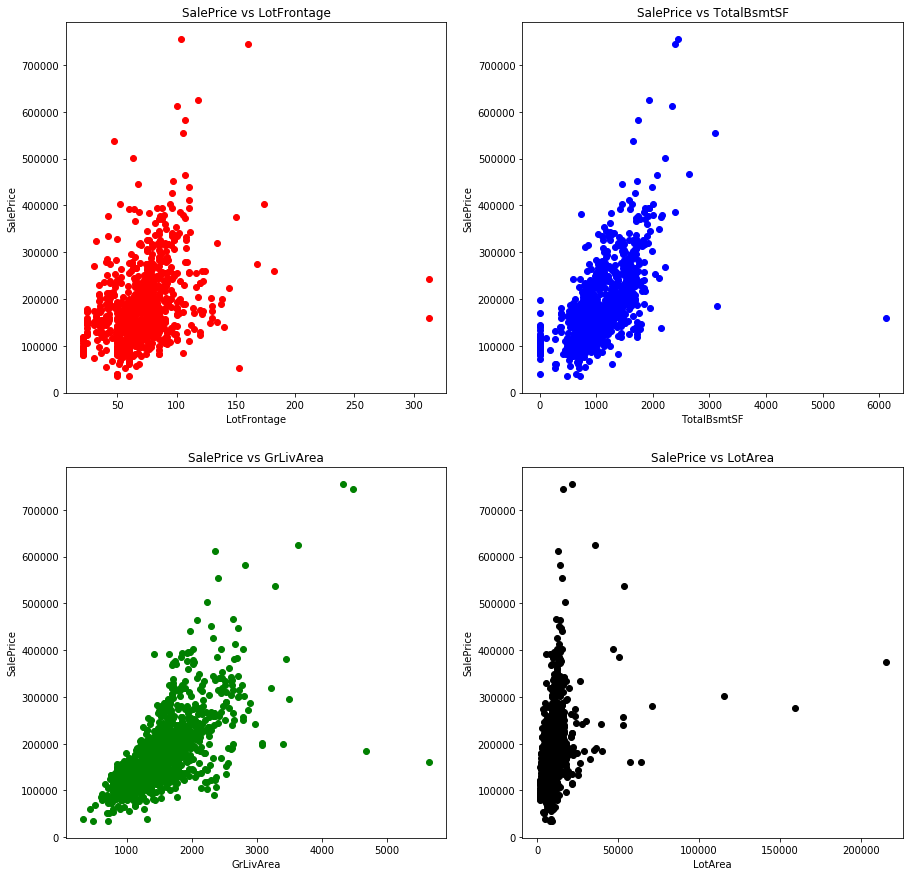

In [2]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Code starts here

# initialize figure and axes
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2,2, figsize=(15,15))

# 'LotFrontage' scatter plot
ax_1.scatter(X_train['LotFrontage'], y_train, color='red')
ax_1.set_xlabel('LotFrontage')
ax_1.set_ylabel('SalePrice')
ax_1.set_title('SalePrice vs LotFrontage')

# 'TotalBsmtSF' scatter plot
ax_2.scatter(X_train['TotalBsmtSF'], y_train, color='blue')
ax_2.set_xlabel('TotalBsmtSF')
ax_2.set_ylabel('SalePrice')
ax_2.set_title('SalePrice vs TotalBsmtSF')

# 'GrLivArea' scatter plot
ax_3.scatter(X_train['GrLivArea'], y_train, color='green')
ax_3.set_xlabel('GrLivArea')
ax_3.set_ylabel('SalePrice')
ax_3.set_title('SalePrice vs GrLivArea')

# 'LotArea' scatter plot
ax_4.scatter(X_train['LotArea'], y_train, color='black')
ax_4.set_xlabel('LotArea')
ax_4.set_ylabel('SalePrice')
ax_4.set_title('SalePrice vs LotArea')

# Display plot
plt.show()

# Code ends here

## Hints
- For initializing figure and axes use `plt.subplots(2,2)`
- For drawing scatter plot for an axes `ax` use `ax.scatter(x,y, color=some_color)`
- To set label axes for X-axis use `ax.set_xlabel('xlabel')`, for Y-axis use `ax.set_ylabel('ylabel')` and for title use `ax.set_title('Title')`

## Test cases
- Check for initialization of `fig`, `ax_1`, `ax_2`, `ax_3`, `ax_4`

### 1.3 Treatment of  outliers

***

In the previous topic you learnt about outlier detection. Now that you have detected their presence (if outliers are there in your dataset), its time to treat them appropriately so that they do not affect the learning algorithm. 


**How to treat outliers once you detected them?**

Once you had detected outliers, what to do with them? This is probably the hardest question to answer. Most parametric statistics like mean, standard deviation, correlation and every statistic based on them are highly sensitive to outliers.  And since the assumptions of common statistical procedures like linear regression and ANOVA, are also based on them, outliers really mess up your analysis.

The type of model you are thinking to train on the data also has a significant impact. For ex: linear models are prone to outliers and hence wouldn't be a good choice for datasets with a significant number of outliers. For these kind of datasets an outlier agnostic model like tree based models would be  a great choice. 

In short, there is **NO** best way to detect and remove outliers. You can and should try out a good number of combinations after very careful examination of the data at hand.


**Treating outliers**

- **Leave it as it is**: In cases where your intuition leads to the conclusion that it is a valid data point, leave the outlier data point in its original state. This type of situation arises when you perform anomaly detection where your main goal is in fact to detect irregularities which are nothing but outliers in the making.

- **Removing the outliers**: Removing data is not a good method at any cost as it leads to loss of information. However, if your dataset has few outliers then it is safe to remove them. Lets look at a way to remove outliers for our dataset feature `'LotFrontage'`. The before (with outliers) and after (without outliers) boxplot are shown below:

| With outliers | Without outliers |
| --- | --- |
| <img src='../images/with_1.png'> | <img src='../images/without_1.png'> |

As expected since you have removed all data points above and below $1.5IQR$ for Q1 and Q3 you will have zero outliers.

- **Impute outliers**: This method suggests imputing outlier data points with other statistics such as mean, median etc or by taking average of nearby values. Imputing can be useful when you have many variables and don't want to throw away a record for a relatively-low-importance variable.

## Out LIARS!

In this task you are going to remove outliers for the numerical features `LotFrontage`, `TotalBsmtSF`, `GrLivArea` and `LotArea` based on the observations from the previous task where you had a scatter plot for every continuous feature vs the target variable.

### Instructions
- Use `pd.concat([X_train, y_train], axis=1)` to concatenate the training features and target vertically. You are doing this step so that the instances get deleted together for both features and targets. Save it as `train`
- On `LotFrontage` from `train` dataframe, select values which are less than $300$ and save as `mask1`
- On `TotalBsmtSF` from `train` dataframe, select values less than $5000$ and save as `mask2`
- On `GrLivArea` from `train` dataframe, select values less than $4500$ and save as `mask3`
- On `LotArea` from `train` dataframe,, select values less than $100000$ and save as `mask4`
- Apply these $4$ masks on `X_train` using `&` operator and save it as `train`

In [3]:
# Code starts here

train = pd.concat([X_train, y_train], axis=1)

# Conditional filtering for 4 features
mask1 = train['LotFrontage'] < 300
mask2 = train['TotalBsmtSF'] < 5000
mask3 = train['GrLivArea'] < 4500
mask4 = train['LotArea'] < 100000

# Masking based on the 4 masks
train = train[mask1 & mask2 & mask3 & mask4]

# Code ends here

## Hints
- Use `.concat([X_train, y_train], axis=1)` for `train`
- For masking column `col` on dataframe `df` use `mask = df[col] < value`
- For applying masks `mask1`, `mask2` use `df = df[mask1 & mask2]`

## Test cases
- Check for variable initialization of `mask1`, `mask2`, `mask3`, `mask4`, `train`
- Check for types of `type(train) == pd.core.frame.DataFrame`, `type(mask1) == pd.core.series.Series`, `type(mask2) == pd.core.series.Series`, `type(mask3) == pd.core.series.Series` and `type(mask4) == pd.core.series.Series`
- Check for shape of `train` i.e. `train.shape == (963,8)`
- Check for sum for all masks via `mask1.sum() == 965`, `mask2.sum() == 1167`, `mask3.sum() == 1166` and `mask4.sum() == 1165`

### 1.4 Detecting missing data

***

In real world scenarios data is very often messy and apart from outliers they also come with missing values, which causes problems when it comes time to do analysis on the data. Before starting any research on a dataset the missing values have to be checked. **Missing data in a dataset is a value that has no computational value.** 

**Is data missing?**

Now that you have dealt with outliers in your training data lets look at the percentage of missing values in `train`. The code snippet is:

```python
# Percentage of missing values in every feature
for column in train.columns:
    print("Percentage of missing values in {} is: {}".format(column, (train[column].isnull().sum()*100)/len(train)))
```

The output is :

<img src='../images/missing.png'>


From the above image it is pretty clear that there is missing data. So, you have to clean the data first. How to do it then?


**Why dealing with missing data is important?**

Before beginning the discussion on handling missing data, always remember, "**There is NO best way to deal with missing data.**" It varies from problem to problem and the type of algorithm you chose. This step is often cited as one of the most ecruciatingly pain points during the data preparation and exploration stage. **Missing value treatment becomes important since the data insights or the performance of your predictive model could be impacted if the missing values are not appropriately handled.**



**How prevalent is the missing data?**

There are various ways by which you can detect missing data with the help of pandas. Some of them are described below: 
- **`.info()`**: This method gives us information of the number of non-null entries per column/feature, data type of every feature and the memory used by the dataframe. The below image shows this method applied on `X_train`

<img src='../images/info_1.png'>

- **`.isnull().sum()`**: This method gives the number of missing values per column/feature. Below figure shows this method applied on `X_train`

<img src='../images/isnullsum_1.png'>

- **`.notnull().sum()`**: As the name suggests this method gives the number of non-missing or valid values per column/feature. Here, valid values means data points other than type `None` or `NaN`. It can be considered as the exact reverse of what `.isnull().sum()` calculated.

<img src='../images/notnull_1.png'>

## Identify percentage of missing values 

In this task you will first calculate the percentage of missing values for every feature and then calculate the percentage of rows which have more than 2 missing entries

### Instructions
- The dataset has been split for you into `X_train` and `y_train`; you will be taking the help of them for further operations
- Create a variable `missing_columns` where you apply `.isnull().sum()` and calculate the percentage of missing values for every feature by dividing every value by `len(X_train)` and multiplying by $100$. 
- Your columns of interest are those which contain more than 50% missing values; so you will create a Boolean condition `mask` which tests if every value in `missing_columns` is greater than 50. Use Boolean indexing to achieve this step
- Now time to extract columns which have more than 50 missing values; you can do it by applying the Boolean condition `mask` on `missing_columns` and apply `.index.tolist()` at its end to extract out the required column names. Store it as `columns` and print it out
- To calculate the percentage of rows with more than 2 missing entries, first obtain the number of instances which have at least 5 non-null entries using `len(X_train.dropna(thresh=5))`; then subtract it from 1 and divide by `len(X_train)`. Finally multiply the result by 100 to obtain the percentage of rows and save it as `rows_percentage`. Print it out

In [4]:
# Split into feature and target
X_train, y_train = train.iloc[:,:7], train[['SalePrice']]

# Code starts here

# percentage of missing values for every feature
missing_columns = (X_train.isnull().sum()*100) / len(X_train)
mask = missing_columns > 50
columns = missing_columns[mask].index.tolist()
print(columns)

# percentage of rows with more than 5 missing values
rows_percentage = (1 - (len(X_train.dropna(thresh=5)) / len(X_train)))*100
print(rows_percentage)

# Code ends here

['PoolQC']
0.0


## Hints
- To create `missing_columns` use `(X_train.isnull().sum()*100)` and divide it by `len(X_train)`
- For creating the boolean condition `mask` use `> 50` on `missing_columns`
- For finding out columns of interest `columns` first apply `mask` on `missing_columns` and extract its index using `.index` and then convert it to a list using `.tolist()` method
- For obtaining percentage of rows which have at least 5 non-null entries subtract `len(X_train.dropna(thresh=5)) / len(X_train` from  1 and then multiply it by 100

## Test cases
- Check for variable initialization of `missing_columns`, `mask`, `columns` and `rows_percentage`
- Check value of `missing_columns` as `missing_columns.values == np.array([0.0, 99.5846313603323, 0.0, 0.0, 0.0, 0.0, 6.334371754932502])`
- Check value for `columns` as `columns == ['PoolQC']`
- Check value for rows_precentage as `rows_percentage == 0.0`

### 1.5 Handling missing data

***

In the previous section you learnt about identifying missing data. The next logical step would be treating missing entries appropriately. Lets look at the approach of handling missing data.


**How to handle missing data**

You can either ignore or treat missing data. Also you can chose to impute instance-wise (rows) or feature-wise (columns). The answer would depend on the percentage of those missing values in the dataset, the variables affected by missing values, whether those missing values are a part of dependent or the independent variables and also the type of dataset. Lets look at the common ways of handling missing data:

- **Removing missing data**: If the missing data is purely due to chance i.e. they are randomly distributed then it makes sense to drop those observations. Also, if any of the features has a high number of missing values then you can safely drop that particular feature. For example in our dataset the feature `PoolQC` has the highest percentage of missing values (**a staggering 100%**) and therefore can be safely eliminated from both training and test features. In fact this is a task at the end of the section. Be prepared to perform it!

    Pandas provides us `.dropna()` method to drop observations. By default it deletes observations and if you want to delete columns containing missing data, use `.dropna(axis=1)`. To make permanent changes to the dataframe, use the argument `inplace=True` inside `.dropna()`. Lets look at an example of the implementation of `.dropna()`:
    
    You have this dataframe `df`: <img src='../images/df.png'>
    
    **If you use `df.dropna()`, the outcome is**: <img src='../images/dropna.png'>
    
    Rows with indices 0 and 2 are absent since they contain **NaN** values
    
    **If you use `df.dropna(axis=1)`, the outcome is**: <img src='../images/dropnaaxis.png'>

    Columns with indices 0 and 1 are absent this time as these columns contain **NaN** values



- **Imputing missing data:** This scenario is encountered most often where you don't want to lose out on learning material for your algorithm. Lets look at some of the ways by which you can impute missing values:

  - **.fillna( )**: pandas provides a convenient method to impute missing values. By default it fills row-wise but you can change it using the argument `axis=1`. Lets look at an implementation of this method and **carefully observe the behaviour of the instance with index 127**:
      - Filling with any value (lets assume 0): Using **`X_train.fillna(0)`** gives:
      
      <img src='../images/fillna_0.png'>
  
      - Filling with the argument `method='ffill`; which stands for forward fill: Using `X_train.fillna(method='ffill')` gives: <img src='../images/ffill.png'>
          
         **`ffill`** fills up the missing value with the nearest value **above the missing data point**; in our case it was filled with **Attchd** since the previous row had **Attchd**. 
          
       - Filling with argument `method='bfill`; which stands for backward fill: Using `X_train.fillna(method='bfill')` gives: <img src='../images/bfill_1.png'>   
         
         **`bfill`** fills up the missing value with the nearest value **below the missing data point**; in our case it was filled with **Atttchd** since the next row had **Attchd**. 


   - **Scikit-learn Imputer**: The `scikit-learn` library also prevides us with an imputer class named `Imputer` to fill in missing values. Lets look at the steps by which you can perform it:
   
       1. Step 1: Import `SimpleImputer` from `sklearn.impute`
       
        **from sklearn.impute import SimpleImputer as Imputer**
       2. Step 2: Calling the function Imputer
       
       *Example 1*: Take the Mean of Column

        **Imputer = Imputer(missing_values = ‘NaN’, strategy = ‘mean’)**

        *Example 2*: Take the Median of Column

        **Imputer = Imputer(missing_values = ‘NaN’, strategy = ‘median’)**

        *Example 3*: Take the Most Frequent value (mode) of Column

        **Imputer = Imputer(missing_values = ‘NaN’, strategy = ‘most_frequent’)**
        
        Here, 
        1. `missing_values`: Default or predefined missing value (in our case it was `NaN`) in our data. 
        2. `strategy`: Value to replace missing data with. You can replace the missing data with  the following values : `'mean'` for mean imputation and is also the default strategy, `'median'` for median imputation and `'most_frequent'` for mode imputation                  
               
       3. Step 3: Fitting Imputer to Data

           Apply imputer to your data. If your missing data is in column 1, then you would like to fit the calculated mean into NaN row within column 1

            **Imputer= Imputer.fit(dataset[: , 1:2])** 
            
       4. Step 4: Transform Data
            
            Replace your blank observations with the calcuated value. In this case, it is going to transform NaN to the mean value.

            **dataset[:,1:2] = Imputer.transform(dataset[: , 1:2])**
            
            An example is shown below: A dataframe is given which looks somewhat like this <img src='../images/sample.png'>. The code snippet along with the results is shown and it looks like this after imputation <img src='../images/imputer.png'> 
       While fitting the imputer function (Step 3) keep in mind to fit on the training data and then use that imputer function to transform both training and test data. This will avoid help you prevent address the problem of data leakage. 

## Treat missing values

In this task you will be dropping the `PoolQC` feature from both training and test data (since it contains 100% missing values). Also, you will be imputing missing data for continuous data using the mean strategy and for categorical data using the mode strategy

### Instructions
- Drop the column `PoolQC` from `X_train` and `X_test` using `.drop()` method. Don't forget to use `axis=1` argument inside it
- An imputer for continuous data by mean values has been defined for you `mean_imputer`. Similarly another imputer `mode_imputer` for catgeorical data is predefined.
- Fit `mode_imputer` data on `X_train[['GarageType']]` and then use it to transform both `X_train[['GarageType']]` and `X_test[['GarageType']]`
Example of transformation:
```python
X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])
```
- Fit `mean_imputer` on `X_train[['LotFrontage']]` and transform on both `X_train[['LotFrontage']]` and `X_test[['LotFrontage']]`. While transforming retain the original variable names.
Example of transformation:
```python
X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])
```

In [5]:
# Import packages
from sklearn.impute import SimpleImputer

# Custom imputers
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Code starts here

# Drop 'PoolQC' from training and test
X_train = X_train.drop('PoolQC', axis=1)
X_test = X_test.drop('PoolQC', axis=1)

# fit 'mode_imputer' on X_train['GarageType']
mode_imputer.fit(X_train[['GarageType']])

# transform to fill missing values for 'GarageType'
X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])
X_test['GarageType'] = mode_imputer.transform(X_test[['GarageType']])

# fit 'mean_imputer' on X_train['LotFrontage']
mean_imputer.fit(X_train[['LotFrontage']])

# transform to fill missing values for 'LotFrontage'
X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])
X_test['LotFrontage'] = mean_imputer.transform(X_test[['LotFrontage']])

# check missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Code ends here

LotFrontage      0
TotalBsmtSF      0
GrLivArea        0
LotArea          0
SaleCondition    0
GarageType       0
dtype: int64
LotFrontage      0
TotalBsmtSF      0
GrLivArea        0
LotArea          0
SaleCondition    0
GarageType       0
dtype: int64


## Hints
- To drop a column `col` from dataframe `df` use `df = df.drop(col, axis=1)`
- To fit an imputer object `imputer` use `imputer.fit(df[col])`
- To fill in missing values using `imputer` for a column `col` of dataframe `df` use `df[col] = imputer.transform(df[col])` 

## Test cases
- Check for shape of `X_train` and `X_test` by `X_train.shape == (963, 6)` and `X_test.shape == (292,6)`
- Check for missing value sum for `X_train` and `X_test` by `X_train.isnull().sum().values.sum() == 0` and `X_test.isnull().sum().values.sum() == 0`

## Chapter 2: Data Transformation

### Description: This chapter introduces the concepts of data transformation techniques like correcting skewness, encoding of categorical variables, standardizing, normalizing etc. 

### 2.1 Transformation to reduce skewness

***

Before beginning with data transformation techniques, can you answer this question: **"Why data transformation?** Because after data cleaning strategies like outlier removal and missing value imputation you have all the data at hand. 


**Need for data transformation**

Its quite simple and pretty straightforward. Lets look at some of the reasons behind it:
- Compare different features by means of standardizing, scaling or normalization
- Detect and eliminate skewness of features to approximate theoritical normal distribution
- Encoding categorical features to numerical ones since most of the learning algorithms can understand numerical data

You will learn about all of them; first lets start with skewness removal techniques. You should remember the following image from your *Descriptive Statistics* concept:

<img src='../images/skewness.jpeg'>


**Why eliminate skewness?**

The distribution of data i.e. its overall shape and how it is spread out can have a significant impact on analysis and modeling. Data that is roughly evenly spread around the mean value also known as normally distributed data tends to be well-behaved. On the other hand, some data sets exhibit significant skewness or asymmetry. If you intend to carry out linear modelling, then normality assumption is a good precursor although not mandatory to make for modelling purposes. Also, transformation by this method help us in reducing the impact of outliers in our data. For ex: Boxcox transformation is an excellent transformation technique which is very robust to outliers. You can read more about it in its [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).


**Detecting skewness**

Generate a histogram for the feature (numeric) to check its shape. If its close to normal then well and good otherwise you must apply some kind of transformation to correct it depending on the type of skewness (right or left). Lets look at the distribution for `SalePrice` in training target set:

<img src='../images/SalePrice.png'>

It is clearly evident that the distribution is right skewed. 


**Correcting skewness**

- **Right skew**: You can correct right skewness by taking logarithms, roots or reciprocals. Lets take a random right skewed dataset and look at its shape after applying logarithmic and square-root transformation.

    **SHAPE BEFORE TRANSFORMATION**
    
    <img src='../images/random.png' width='400'>

| **SHAPE AFTER SQUARE-ROOT TRANSFORMATION** | **SHAPE AFTER LOGARITHMIC TRANSFORMATION** |
| --- | --- |
| <img src='../images/sqrt.png' width='400'> | <img src='../images/log.png' width='400'> |

  You can clearly observe that the distribution approaches a normal distribution in case of the square-root transformation; while in the case of logarithmic transformation skewness decreases but doesn't approach a normal distribution. 
    
- **Left skew**: For left skewness you should consider taking powers greater than 1; for ex: squares, cubes or higher powers.

    **SHAPE BEFORE TRANSFORMATION**
    
    <img src='../images/left_skew.png'>
    
| **SHAPE AFTER SQUARE TRANSFORMATION** | **SHAPE AFTER CUBIC TRANSFORMATION** |
| --- | --- |
| <img src='../images/square.png' width='400'> | <img src='../images/cube.png' width='400'> |

   Clearly, the skewness reduces as we go from *UNTRANSFORMED ---> SQUARE ----> CUBIC* transform. In other words, you are proceeding towards normality in this direction.
    

## Eliminate skewness from `SalePrice`

In this task you will be eliminating skewness by eliminating the right skewness of the response variable `SalePrice` given by `y_train`

### Instructions
- Apply logarithmic transformation using `np.log()` on `y_train` and save it as `y_train`
- Using `sns.distplot()` method of seaborn, visualize its distribution to check if `y_train` is now approximately normally distributed

/home/bick23/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


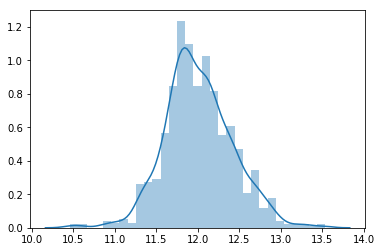

In [6]:
# import packages
import seaborn as sns

# Code starts here

# log transformation
y_train = np.log(y_train)

# visualize distribution
sns.distplot(y_train)

# display plot
plt.show()

# Code ends here

## Hints
- Log transform using `np.log()`
- Use seaborn to visualize distribution with `sns.distplot()`

## Test cases
- Check for variable initialization of `y_train`
- Check the first value of `y_train` by `12.075394321888057 == y_train.values[0][0]`

### 2.2 Standardizing and normalizing continuous variables

***

**Motivation for transforming continuous features**

Most of the times, your dataset will contain features highly varying in magnitudes, units as well as range.  However, most of the machine learning algorithms use Eucledian distance between two data points in their computations and this is a major problem. Because if left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units; for example 5km and 5000m. Obviously in this case the features with high magnitudes (5000m) will weigh in a lot more in the distance calculations than features with low magnitudes (5km) although the latter might actually be of far greater value.

There are a number of ways to transform numerical features so that they are on the same scale. This makes features comparable as well as stabilizing the learning process of the algorithm.


**Different types of rescaling techniques**

Lets look at some of the common ways of achieving continuous feature transformation via rescaling and apply it on the `LotFrontage` feature:

1. **Scaling**: Take a value, subtract it by the minimum value and divide it by the difference of the maximum and minimum value. It normalizes the range of features to the range [0, 1] or [-1.1] depending on choice.  In this type you will end up with smaller standard deviations, which can suppress the effect of outliers.

    An example demonstrating min-max scaling is shown below with the formula: 

<img src='../images/min_max.png'>

   For ex: $x = 55$
   
   $min (x) = 35$
      
   $max (x) =77$
      
   $z = \frac{(55- 35)} {(77- 35)} = 0.47$
      
   *Scikit-learn implementation pseudocode*: 
```python
# Import packages
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
scaler = MinMaxScaler()

# Fit on training data with columns of interest
scaler.fit(X_train[columns])

# Transform on training data with columns of interest
X_train[columns] = scaler.fit_transform(X_train[columns])

# Transform on test data with columns of interest
X_test[columns] = scaler.fit_transform(X_test[columns])    
```
Applying this `scaler` object on `LotFrontage` gave new values which look something like this:
```python
array([[0.36645963],
       [0.30434783],
       [0.01863354],
       [0.41614907],
       [0.24223602],
       [0.01863354],
       [0.26708075],
       [0.19254658],
       [0.18012422],
       [0.34161491],
       [0.33540373],
       [0.21118012],
       [0.24223602],
       ............
       ............
```

2. **Standardization**: Rescale features so that they’ll have the properties of a standard normal distribution with $μ = 0$ and $σ = 1$ where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as:
 $$z = \frac{x − μ}{σ}$$

    This method isn't only important while comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. For example, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates

$Δw_j = −η\frac{∂J}{∂w_j} = η∑(t^{(i)} − o^{(i)})x^{(i)}{_j}$,
so that

  $w_j := w_j + Δw_j$, where η is the learning rate, t the target class label, and o the actual output. The part $x^{(i)}{_j}$ has a significant impact on the learning process; higher it is, the more jumps gradient descent makes and vice versa. Scaling it via standardization can stabilize the learning algorithm and help us find the optimal solution.

*Scikit-learn implementation pseudocode*:

```python
# Import packages
from sklearn.preprocessing import StandardScaler

# Initialize scaler object
scaler = StandardScaler()

# Fit on training data with columns of interest
scaler.fit(X_train[columns])

# Transform training data with columns of interest
X_train[columns] = scaler.transform(X_train[columns])

# Transform test data with columns of interest
X_test[columns] = scaler.transform(X_test[columns])
```
Applying this scaler on `LotFrontage` gave new values which look something like this:
```python
array([[ 0.48135255],
       [ 0.02587205],
       [-2.06933827],
       [ 0.84573696],
       [-0.42960846],
       [-2.06933827],
       [-0.24741625],
       [-0.79399286],
       [-0.88508896],
       [ 0.29916035],
       [ 0.2536123 ],
       [-0.65734871],
       .............
       .............
```

   *NOTE*: **Always fit scaler object on training data; use this fitted scaler object to then transform both training and test dataset to avoid data leakage.**

## Scale your numerical features

In this task you will normalize your continuous features `'LotFrontage'`, `'TotalBsmtSF'`, `'GrLivArea'` and `'LotArea'` which are saved in a list `num_columns`

### Instructions
- Initialize a scaler object `normalizer` by assigning it to `MinMaxScaler` which will set values for continuous features in the range [0,1]
- Fit `normalizer` object on the numerical columns given by `num_columns` of `X_train` using `.fit()` method
- Transform using `.transform()` on the same set of columns for `X_train` and `X_test`. Store the transformed values in the same object. A sample transformation is shown below
```python
X_train[columns] = scaler.transform(X_train[columns])
```
- Print out the first five rows of `X_train` and `X_test` to see the difference

In [7]:
# numerical columns
num_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

# Import packages
from sklearn.preprocessing import MinMaxScaler

# Code starts here

# Initialize scaler
normalizer = MinMaxScaler()

# Fit on training data
normalizer.fit(X_train[num_columns])

# Transform training data
X_train[num_columns] = normalizer.transform(X_train[num_columns])

# Transform test data
X_test[num_columns] = normalizer.transform(X_test[num_columns])

# Code ends here

/home/bick23/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Hints
- Initialize `normalizer` with `normalizer = MinMaxScaler()`
- To fit `normalizer` object on training data `df` with columns `cols` use `normalizer.fit(df[cols])`
- To transform `cols` of `df` using `normalizer` use `df[cols] = normalizer.transform(df[cols])`

## Test cases
- Check variable initialization `normalizer`
- Check this condition `[0.36645962732919246,
 0.4014221073044602,
 0.21921776919362626,
 0.11724207609260437] == X_train[num_columns].iloc[0,:].values.tolist()`
 - Check this condition `[0.4906832298136645,
 0.48513251454427925,
 0.3541767262192178,
 0.20387102361295537] == X_test[num_columns].iloc[0,:].values.tolist()`

### 2.3 Encoding categorical data

***

Many machine learning algorithms support categorical values without further manipulation but there are algorithms that don't. Therefore, there is the challenge of figuring out how to turn these kind of attributes into numerical values for further processing. **There is no single BEST answer on how to approach this problem. Each approach has trade-offs and has potential impact on the outcome of the analysis.** Fortunately, Python libraries like pandas and scikit-learn provide several approaches that can be applied to transform the categorical data into suitable numeric values. 
 
In our housing dataset, the columns `SaleCondition` and `GarageType` are categorical in nature. `SaleCondition` contains values like `Normal`, `Partial`, `Abnormal` while `GarageType` has `Attchd`, `Detchd`, `BuiltIn`. Lets look at the ways by which you can convert them into numbers:

1. **Label encoding**: It convert each value in a column to a number where numerical labels are always between 0 and $\text{number of categories} - 1$. Lets look at the ways to do it:

   - *With the help of pandas*: Use `.cat.codes` attribute to convert a particular feature to numbers; but before that set the data type for that feature to category using `.astype('category')`. **It converts different values for a feature alphabetically i.e. `A` to 0, `B` to 1 and so on.** A sample snippet is shown below where we convert `SaleCondition` to category:
    
```python
# Convert to category type using type casting
X_train['SaleCondition'] = X_train['SaleCondition'].astype('category')

# Label encode 'SaleCondition' feature
X_train['SaleCondition'] = X_train['SaleCondition'].cat.codes

# Look at the first five rows
print(X_train.head())
```
The output of the code is:
<img src='../images/cat.png'>

You can see that the categories for `SaleCondition` has been converted to numbers

   - *With scikit-learn*: Use `LabelEncoder` function from scikit-learn's `preprocessing` module and fit-transform on the data. This method also encodes data alphabetically. An example snippet is shown below:
   
```python
# Import packages
from sklearn.preprocessing import LabelEncoder

# Initialize encoder object
encoder = LabelEncoder()

# Fit-transform on data
X_train['SaleCondition'] = encoder.fit_transform(X_train['SaleCondition'])
```

The output of the code is the same:
<img src='../images/cat.png'>


2. **One-hot-encoding**: Although label encoding is intuitive and may give you a good performance from your learning algorithm, but it has a disadvantage that the numerical values can be very often misinterpreted by the algorithm; especially in the case of nominal values. For ex: you map Male and Female as 1 and 0 respectively and the learning algorithm places more emphasis on Males (due to 1); but actually there is no such thing as more or less for gender as it is a nominal variable. So, there comes another approach called **One-hot encoding**. In this approach each category of a particular feature is made into a new column and assign a `1` or `0` (`True`/`False`) value to the column. This has the benefit of not weighting a value improperly. Now lets look at some ways to achieve this:

  - *With pandas*: Pandas lets you do this with the help of `.get_dummies()` method. An example is shown below where we create a new dataframe `df` for categories on `SaleCondition`:
    
```python
# One-hot encoding on 'SaleCondition
df = pd.get_dummies(X_train['SaleCondition'])

# First five rows
print(df.head())
```
The output is: <img src='../images/ohe_1.png'>

You can see that the categories have been first converted into numbers $0-5$ and then they are represented by columns with values either $1$ or $0$. 
   
   - *With scikit-learn*: Scikit-learn does the same thing as `.get_dummies()` but with the `LabelBinarizer` function from `preprocessing` library. Lets look how with code snippet:
   
```python
# Import packages
from sklearn.preprocessing import LabelBinarizer

# Initialize encoder
encoder = LabelBinarizer()

# Fit and transform on data
print(pd.DataFrame(encoder.fit_transform(X_train['SaleCondition']), columns=[0,1,2,3,4,5]))
```
The output is:

```python
     0  1  2  3  4  5
0    0  0  0  0  1  0
1    0  0  0  0  1  0
2    0  0  0  0  1  0
3    1  0  0  0  0  0
4    0  0  0  0  1  0
5    0  0  0  0  1  0
6    0  0  0  0  1  0
7    0  0  0  0  1  0
8    0  0  0  0  1  0
9    0  0  0  0  1  0
10   0  0  0  0  1  0
11   0  0  0  0  1  0
12   0  0  0  0  1  0
13   0  0  0  0  0  1
14   0  0  0  0  0  1
15   0  0  0  0  1  0
.....................
.....................
```
   One-hot encoding seems very promising but it has the disadvantage that it increases our number of features which might lead to too many features and give rise to the **curse of dimensionality**. It is a curse to work in higher dimensions because normal things tend to break in such cases. 

   So, there is a definite trade-off between Label and Ohe hot encoding and since there is no proper method to figure out which is the correct way to encode, we strongly suggest to try out both these methods or decide on a particular method after careful consideration.

## Encode categorical features `SaleCondition` and `GarageType`

In this task you will perform both Label Encoding and One-hot encoding to encode categorical features into numerical ones.

### Instructions
- Initialize label encoer object `label_encoder` using `LabelEncoder()` which has been imported for you
- Fit and transform `SaleCondition` feature using `label_encoder`s `.fit_transform()` method on both `X_train` and `X_test`. Take help from code snippets given in the tutorial if you get stuck 
- Then use One-Hot Encoding to encode `GarageType` using `.get_dummies()` on `X_train` and `X_test` and save them as `x_train` and `x_test`
- Print out first five rows of `x_train` and `x_test`

In [8]:
# Import packages
from sklearn.preprocessing import LabelEncoder

# Code starts here

# Initialize label encoder object
label_encoder = LabelEncoder()

# Transform to labels for training and test 'SaleCondition'
X_train['SaleCondition'] = label_encoder.fit_transform(X_train['SaleCondition'])
X_test['SaleCondition'] = label_encoder.fit_transform(X_test['SaleCondition'])

# OHE by get dummies
x_train = pd.get_dummies(X_train)
x_test = pd.get_dummies(X_test)

# print out first 5 rows
print(x_train.head())
print('='*50)
print(x_test.head())

# Code ends here

      LotFrontage  TotalBsmtSF  GrLivArea   LotArea  SaleCondition  \
455      0.366460     0.401422   0.219218  0.117242              4   
863      0.304348     0.371041   0.196523  0.093153              4   
504      0.018634     0.276341   0.238532  0.011994              4   
1413     0.416149     0.595992   0.364558  0.137362              0   
1389     0.242236     0.237557   0.213423  0.065282              4   

      GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
455                   0                  1                   0   
863                   0                  1                   0   
504                   0                  1                   0   
1413                  0                  1                   0   
1389                  0                  0                   0   

      GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  
455                    0                   0                  0  
863                    0                   0      

## Hints
- Initialize Label Encoder object `label_encoder` first
- To transform `col` column of dataframe `df` using `encoder` use `df[col] = encoder.fit_transform(df[col])`
- For One-hot encoding with pandas use `df = pd.get_dummies(df)`

## Test cases
- Check variable initialization for `label_encoder`, `x_train` and `x_test`
- Check length of `x_train` and `x_test` columns list using `len(x_train.columns) == 11` and `len(x_test.columns) == 11`
- Check first row for `x_train` by `x_train.iloc[0,:].values.tolist() == [0.36645962732919246, 0.4014221073044602, 0.21921776919362626, 0.11724207609260437, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]`
- Similarly check for `x_test` using `x_train.iloc[0,:].values.tolist() == [0.36645962732919246, 0.4014221073044602, 0.21921776919362626, 0.11724207609260437, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]`